In [4]:
import sys
import os
sys.path.append("../")
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
from scale_rl.common.wandb_utils import *

### Collect results


#### Off-Policy

In [53]:
sac_simba_eval_df = pd.read_csv('../results/sac_simba.csv', index_col=0)
ddpg_simba_eval_df = pd.read_csv('../results/ddpg_simba.csv', index_col=0)
tdmpc2_simba_eval_df = pd.read_csv('../results/tdmpc2_simba.csv', index_col=0)

In [54]:
sac_eval_df = pd.read_csv('../results/sac.csv', index_col=0)
ddpg_eval_df = pd.read_csv('../results/ddpg.csv', index_col=0)

bro_eval_df = pd.read_csv('../results/bro.csv', index_col=0)
td7_eval_df = pd.read_csv('../results/td7.csv', index_col=0)
tdmpc2_eval_df = pd.read_csv('../results/tdmpc2.csv', index_col=0)
dreamer3_eval_df = pd.read_csv('../results/dreamerv3.csv', index_col=0)

#### On-Policy

In [55]:
ppo_simba_eval_df = pd.read_csv('../results/ppo_simba.csv', index_col=0)
ppo_eval_df = pd.read_csv('../results/ppo.csv', index_col=0)

#### URL

In [56]:
metra_simba_eval_df = pd.read_csv('../results/metra_simba.csv', index_col=0)
metra_eval_df = pd.read_csv('../results/metra.csv', index_col=0)

#### Collection

In [57]:
off_policy_df = pd.concat([
    sac_simba_eval_df, 
    ddpg_simba_eval_df, 
    tdmpc2_simba_eval_df, 
    sac_eval_df, 
    ddpg_eval_df,
    bro_eval_df,
    td7_eval_df,
    tdmpc2_eval_df,
    dreamer3_eval_df,
    ], ignore_index=True, sort=False)
off_policy_df['env_name'] = off_policy_df['env_name'].str.replace('-', '_')
off_policy_df

,exp_name,env_name,seed,metric,env_step,value
0,sac_simba,dog_trot,4000,avg_return,0.0,10.229937
1,sac_simba,dog_trot,4000,avg_return,50000.0,64.202362
2,sac_simba,dog_trot,4000,avg_return,100000.0,148.874287
3,sac_simba,dog_trot,4000,avg_return,150000.0,258.045214
4,sac_simba,dog_trot,4000,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
103252,dreamerv3,walker_walk,3,avg_return,300000.0,925.014982
103253,dreamerv3,walker_walk,3,avg_return,350000.0,936.634629
103254,dreamerv3,walker_walk,3,avg_return,400000.0,792.896831
103255,dreamerv3,walker_walk,3,avg_return,450000.0,938.021900


In [58]:
exp_names = off_policy_df['exp_name'].unique()
exp_names

array(['sac_simba', 'ddpg_simba', 'simba_td_mpcv2', 'sac', 'ddpg', 'bro',
       'TD7', 'td_mpcv2', 'dreamerv3'], dtype=object)

### Visualization

In [59]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x/1000)])

In [60]:
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, TASK_SUCCESS_SCORE
from scale_rl.envs.myosuite import MYOSUITE_TASKS

def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

DMC_EASY_MEDIUM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)

#### DMC Easy-Medium

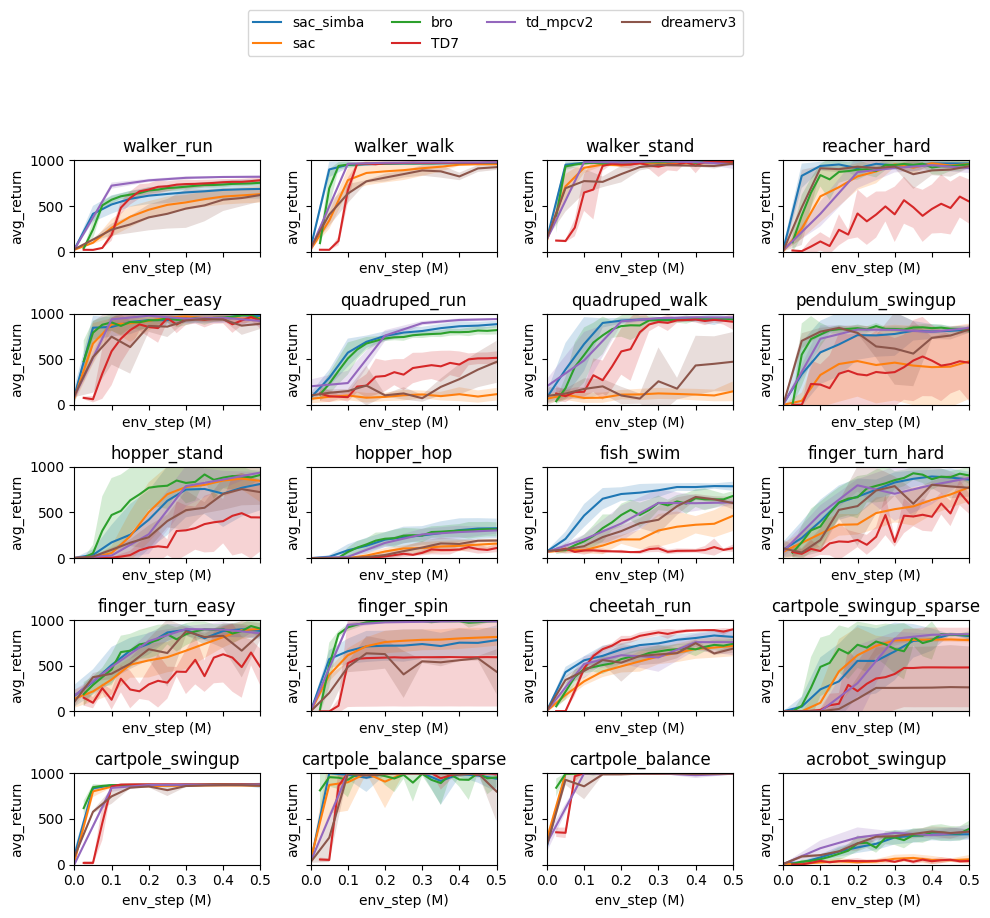

In [61]:
dmc_easy_medium_eval_df = off_policy_df[off_policy_df['env_name'].isin(DMC_EASY_MEDIUM)]
plot_metric_history_per_env(
    dmc_easy_medium_eval_df,
    plot_width= 10,
    plot_height = 8, 
    num_plots_per_row=4,
    x_lim_max = 5e5,
)

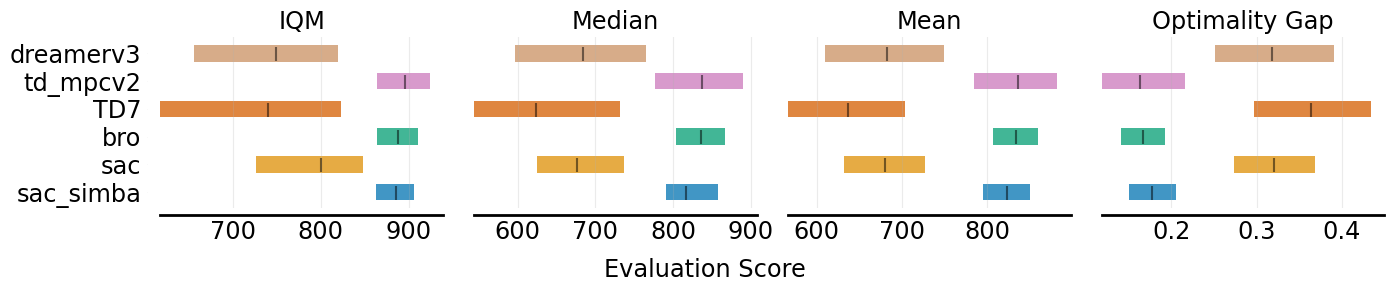

In [62]:
dmc_easy_medium_metric_matrix_dict = generate_metric_matrix_dict(
    dmc_easy_medium_eval_df, 
    env_step=500_000, 
    metric_type='avg_return'
)
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  dmc_easy_medium_metric_matrix_dict, aggregate_func, reps=10000
)

fig, axes = rly_plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
  algorithms=['sac_simba', 'sac', 'bro', 'TD7', 'td_mpcv2', 'dreamerv3'],
  xlabel_y_coordinate=-0.2,
  xlabel='Evaluation Score',
)

#### DMC Hard

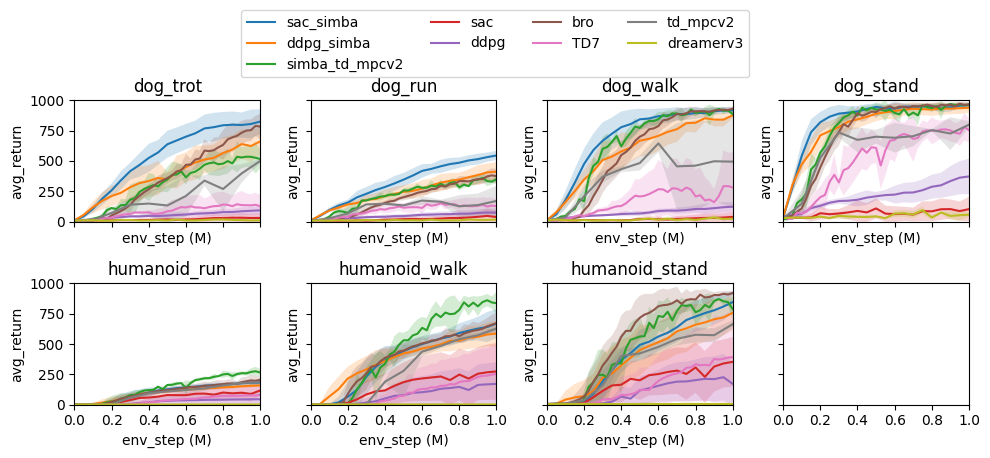

In [63]:
dmc_hard_eval_df = off_policy_df[off_policy_df['env_name'].isin(DMC_HARD)]
plot_metric_history_per_env(
    dmc_hard_eval_df, 
    num_plots_per_row=4,
    x_lim_max = 1e6,
)

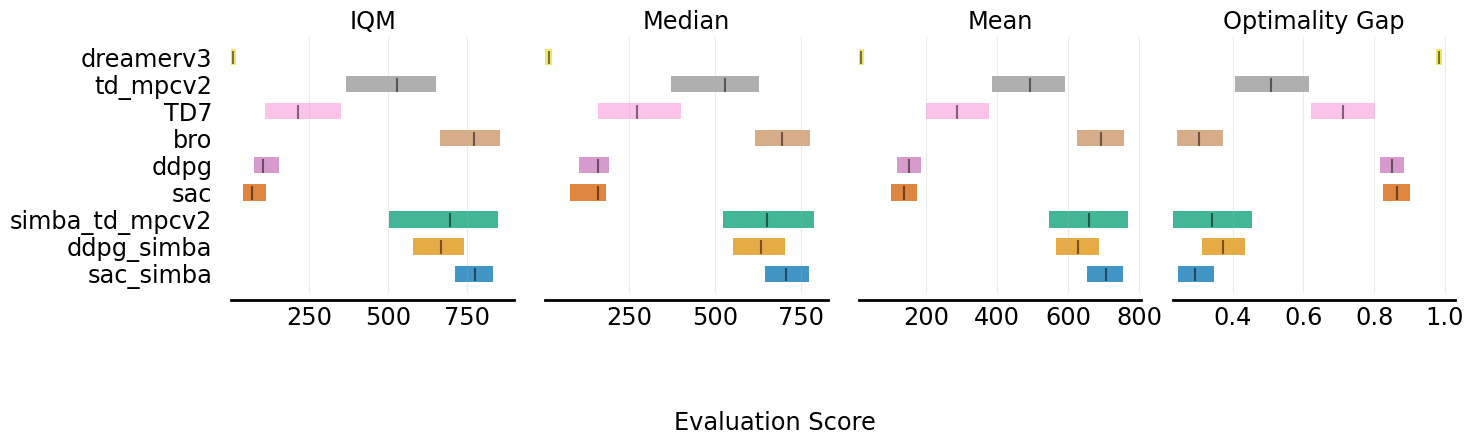

In [64]:
dmc_hard_metric_matrix_dict = generate_metric_matrix_dict(dmc_hard_eval_df, env_step=1_000_000, metric_type='avg_return')
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  dmc_hard_metric_matrix_dict, aggregate_func, reps=10000)

fig, axes = rly_plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
  algorithms=exp_names,
  xlabel_y_coordinate=-0.3,
  xlabel='Evaluation Score',
)

#### Humanoid Bench

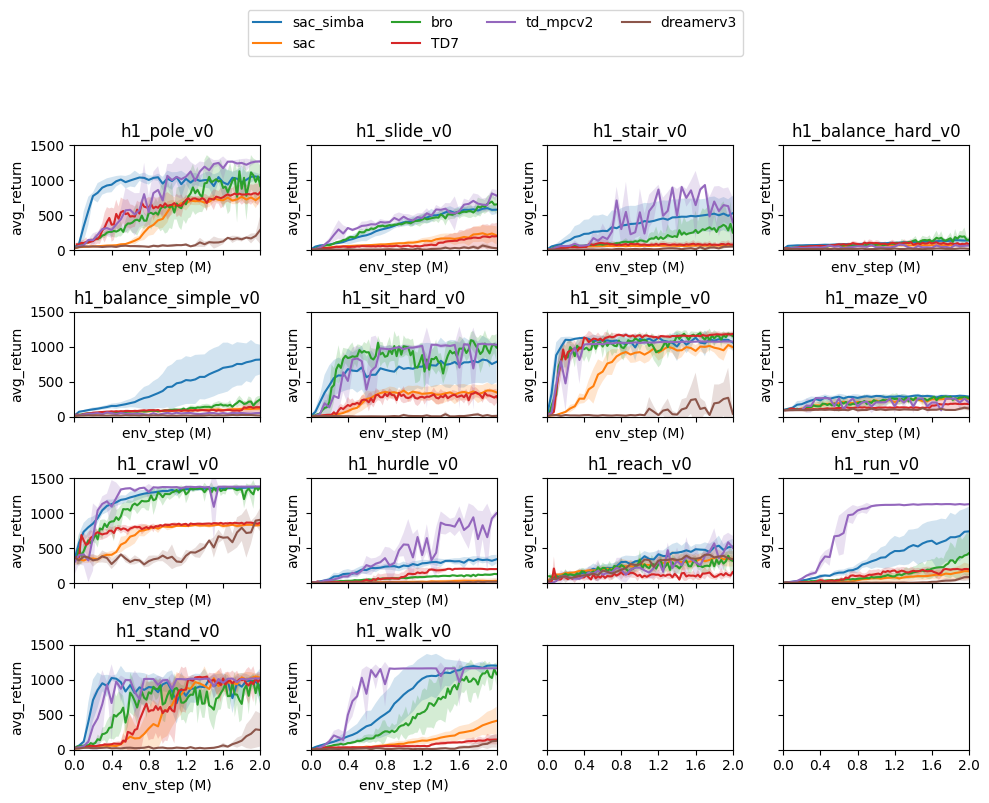

In [65]:
hb_eval_df = off_policy_df[off_policy_df['env_name'].isin(HB_LOCOMOTION_NOHAND)]
hb_eval_df = normalize_values(hb_eval_df, TASK_SUCCESS_SCORE)
plot_metric_history_per_env(
    hb_eval_df, 
    plot_height = 7, 
    num_plots_per_row=4,
    x_lim_max = 2e6,
    y_lim_max = 1500,
)

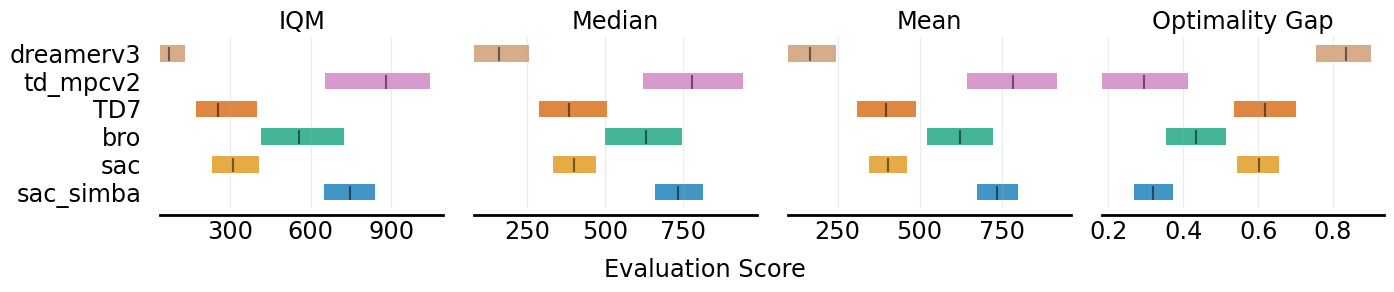

In [66]:
hb_metric_matrix_dict = generate_metric_matrix_dict(hb_eval_df, env_step=2_000_000, metric_type='avg_return')
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  hb_metric_matrix_dict, aggregate_func, reps=10000)

fig, axes = rly_plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
  algorithms=['sac_simba', 'sac', 'bro', 'TD7', 'td_mpcv2', 'dreamerv3'],
  xlabel_y_coordinate=-0.2,
  xlabel='Evaluation Score',
)

#### Myosuite

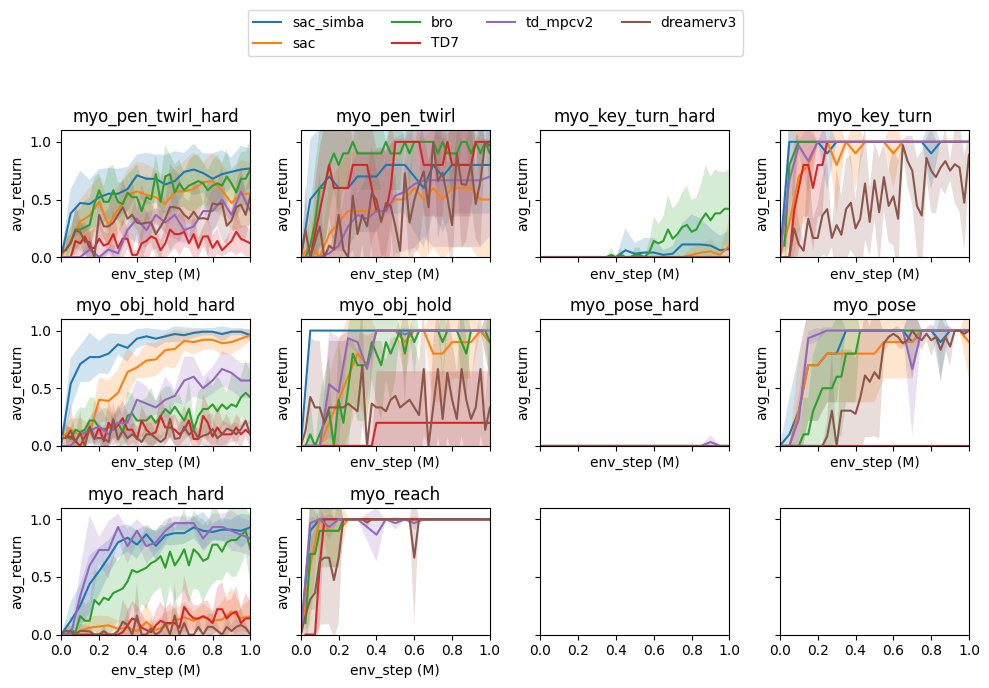

In [67]:
myo_eval_df = off_policy_df[off_policy_df['env_name'].isin(MYOSUITE_TASKS)]
plot_metric_history_per_env(
    myo_eval_df,
    metric = "avg_success" ,
    plot_height = 6, 
    num_plots_per_row=4,
    x_lim_max = 1e6,
    y_lim_max = 1.1,
)

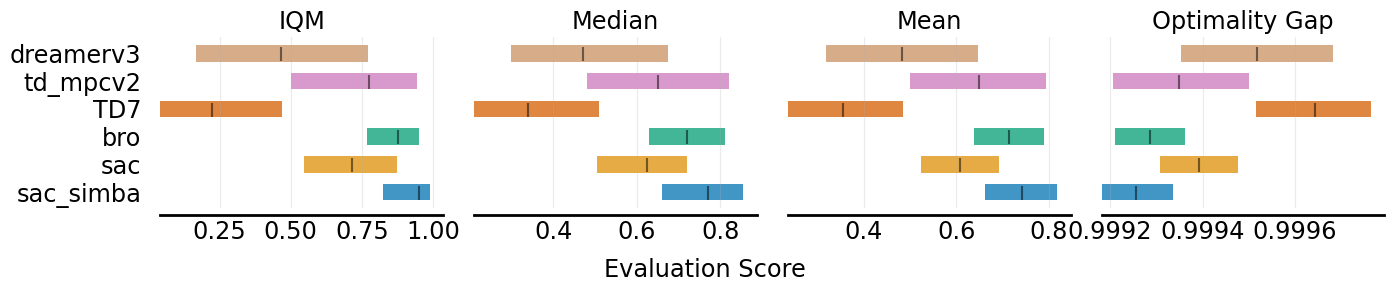

In [68]:
myo_metric_matrix_dict = generate_metric_matrix_dict(myo_eval_df, env_step=1_000_000, metric_type='avg_success')
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  myo_metric_matrix_dict, aggregate_func, reps=10000)

fig, axes = rly_plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
  algorithms=['sac_simba', 'sac', 'bro', 'TD7', 'td_mpcv2', 'dreamerv3'],
  xlabel_y_coordinate=-0.2,
  xlabel='Evaluation Score',
)